# 1.

Supoort Vector Machine에 기본이 되는 아이디어는 무엇인가?

```
답답
```

# 2.

Support Vector이란?

```
답답
```

# 3.

SVM을 사용하면서, 입력되는 데이터의 스케일이 왜 중요한가?

```
답답
```

# 4.

SVM 분류 모델이 인스턴스를 분류할 때 신뢰점수(Confidence Score)나 확률치로 결과를 낼 수 있는가?

```
답답
```

# 5.

수백개의 특징들과 수백만개의 인스턴스로 이루어진 학습 데이터 세트에 대해서 모델을 학습시키기 위해 SVM 문제를 원초적인 형태 혹은 이중 형태를 사용해야하는가?

```
답답
```

# 6.

RBF 커널을 사용해서 SVM 분류모델을 학습시키고자 한다. 학습 데이터를 underfitting할 것 같아 보이는데 γ(감마)값을 올려야하는가 내려야하는가. c값은 또 어떻게 해야하는가?

```
답답
```

# 7.

바로 사용이 가능한 QP solver를 사용하여 유연한 마진 선형(Soft Margin Linear) SVM 문제를 해결하기위해서 QP 파라미터 값 H,f,A,b을 어떻게 설정해야하는가? 

```
답답
```

# 8.

선형적으로 나뉘어 질 수 있는 데이터 세트에 대해서 `LinearSVC`를 학습시켜보자. 그리고 같은 데이터 세트에 대해서 `SVC`와 `SGDClassifier`도 학습을 시켜보자. 이 세 모델끼리 서로 얼마나 비슷한지 한번 확인해보자

Iris 데이터 세트를 사용해보자. Iris-Setosa와 Iris-Versicolor 클래스는 선형으로 나뉘어진다.

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이와 넓이
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [2]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        n_iter=100000, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

/home/hahnz/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


LinearSVC:                    [ 0.28480668] [[ 1.05542422  1.09851637]]
SVC:                          [ 0.31933577] [[ 1.1223101   1.02531081]]
SGDClassifier(alpha=0.00200): [ 0.32] [[ 1.12293103  1.02620763]]


각각 세 개의 모델이 가지는 의사결정선을 그래프로 그려보자.

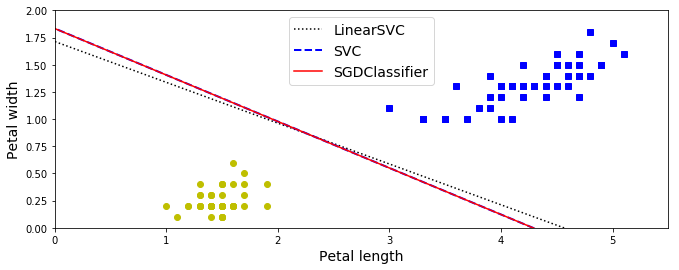

In [3]:
import matplotlib.pyplot as plt

# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris-Versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris-Setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

꽤나 가깝다!

# 9.

MNIST 데이터세트에 대해서 SVM 분류 모델을 학습시켜보자. SVM 분류 모델은 이항 분류 모델이기 때문에, 모든 10개 숫자를 분류하기 위해서는 일대 다 전략을 사용할 필요가 있다. 과정에 대한 속도를 올리기 위해서 작은 검증 데이터 세트를 사용해 하이퍼 파라미터를 조율하고 싶을지도 모른다. 정확도가 어떻게 되는가?

먼저 데이터 세트를 불러오고 학습 데이터 세트와 테스트 데이터로 나누어 준다. `train_test_split()`를 사용할 수도 있지만 사람들은 보통 처음 6만장을 학습 데이터 세트로, 마지막 1만장을 테스트 데이터로 사용한다.

In [4]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
X = mnist["data"]
y = mnist["target"]

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

많은 학습 알고리즘들은 학습 인스턴스의 순서에 민감하기 때문에, 일반적으로 데이터를 먼저 섞는 연습을 하는 것이 일반적으로 좋다.

In [5]:
import numpy as np
np.random.seed(42)
rnd_idx = np.random.permutation(60000)
X_train = X_train[rnd_idx]
y_train = y_train[rnd_idx]

이제 선형 SVM 분류모델로 시작해보자. 이는 자동으로 One-vs-All(또한 One-vs-the-Rest, OvR이라고도 불린다.) 전략을 사용할 것이기에, 우리가 특별하게 무엇을 설정해줄 필요가 없다. 매우 쉽다!

In [6]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

학습 데이터 세트를 사용해 예측을 해보고 정확도를 측정해보자. (학습된 모델중 어떤 것을 최종적으로 고를지 정하지 않았기 때문에, 아직은 테스트 데이터에 대해서 테스트할 필요는 없다.)

In [7]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.82633333333333336

MNIST 데이터로 82%의 정확도는 정말 나쁜 성능이다. 이 선형 모델은 분명히 MNIST 데이터를 분류하기에는 너무 가벼웠지만, 아마 일단 데이터를 먼저 스케일링해줄 필요가 있다.

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [9]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [10]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9224

좀 더 나아졌지만, 여전히 MNIST 데이터 분류 성능으로써는 전혀 좋지 못하다. 만약 SVM을 사용하고 싶다면, 커널기법도 같이 쓰는 것이 좋을 것같다. 기본 커널인 RBF 커널로 `SVC`를 사용해보자.

**주의**: 만약 Scikit-Learn 버전이 0.19 이하라면 `SVC`는 기본 설정 전략이 One-vs-One이므로, 대신에 OvR 전략을 사용하고 싶다면`decision_function_shape="ovr"`라고 명시적으로 설정해주어야만 한다. (OvR 전략은 0.19버전 이후로 기본값 설정이 된다.)

In [11]:
svm_clf = SVC(decision_function_shape="ovr")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.94615000000000005

유망한 모델 같다. 6배나 적은 데이터로 학습시킨 모델이지만 성능이 더 좋아졌다. 교차 검증법으로 확률적 탐색을 해 하이퍼 파라미터를 조율해보자. 처리의 속도를 올리기 위해 작은 데이터 세트를 사용할 것이다.

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] gamma=0.00176607465048, C=8.85231605842 .........................
[CV] .......... gamma=0.00176607465048, C=8.85231605842, total=   0.6s
[CV] gamma=0.00176607465048, C=8.85231605842 .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .......... gamma=0.00176607465048, C=8.85231605842, total=   0.6s
[CV] gamma=0.00176607465048, C=8.85231605842 .........................
[CV] .......... gamma=0.00176607465048, C=8.85231605842, total=   0.6s
[CV] gamma=0.00636473705545, C=1.82719601047 .........................
[CV] .......... gamma=0.00636473705545, C=1.82719601047, total=   0.7s
[CV] gamma=0.00636473705545, C=1.82719601047 .........................
[CV] .......... gamma=0.00636473705545, C=1.82719601047, total=   0.7s
[CV] gamma=0.00636473705545, C=1.82719601047 .........................
[CV] .......... gamma=0.00636473705545, C=1.82719601047, total=   0.7s
[CV] gamma=0.0513498334519, C=9.87519919377 ..........................
[CV] ........... gamma=0.0513498334519, C=9.87519919377, total=   0.7s
[CV] gamma=0.0513498334519, C=9.87519919377 ..........................
[CV] ........... gamma=0.0513498334519, C=9.87519919377, total=   0.7s
[CV] gamma=0.0513498334519, C=9.87519919377 ..........................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   28.5s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f34117134a8>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f340ee2b940>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [14]:
rnd_search_cv.best_estimator_

SVC(C=8.8523160584230869, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001766074650481071,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
rnd_search_cv.best_score_

0.85599999999999998

꽤 낮아보이지만 1000개의 인스턴스에 대해서만 학습을 시킨 모델이라는 것을 기억하자. 이제 전체 학습 데이터 세트에 대해서 재학습 시켜보자.(밤에 학습을 시켜놓고 자고 일어나 아침에 결과를 확인하자. 오래걸린다.)

In [16]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=8.8523160584230869, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001766074650481071,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [17]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.99965000000000004

아주 좋다! 이 모델을 선택해서 사용하자 이제 테스트 데이터 세트를 사용해서 테스트를 진행해보자.

In [18]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.97089999999999999

나쁘지 않지만, 분명히 이 학습 모델은 조금 과잉학습을 한 것같다. 조금 더 하이퍼 파라미터를 조율하는것(예: `C`랑/혹은 `gamma`를 감소시켜보기)이 솔깃하지만, 테스트 데이터 셋을 과잉학습할 위험을 가지고 있다. 다른 사람들은 하이퍼 파라미터`C=5` and `gamma=0.005`가 더 나은 성능(정확도 98% 이상)을 뽑아낸다는 것을 알아냈다. 더 거대하고 긴 학습 데이터 세트에 대해서 확률적 탐색을 하는 것으로 이를 더 잘 찾아줄 수 있을지 모른다.

## 10.

캘리포니아 하우징 데이터 세트에 대해서 SVM 회귀 모델을 학습시켜보자

Scikit-Learn의 `fetch_california_housing()` 함수를 사용해서 데이터 세트를 불러오자.

In [19]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

학습 데이터와 테스트 데이터 세트로 나누자.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

데이터 스케일링도 잊지말고 해주자.

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

먼저 간단하게 `LinearSVR`로 학습을 시켜보자:

In [22]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

이제 학습 데이터에 대한 성능을 확인해보자.

In [23]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.949968822217229

RMSE도 살펴보자

In [24]:
np.sqrt(mse)

0.97466344048457521

이 학습 데이터 세트에서 목표층은 수만 달러이다. RMSE는 우리가 기대한 (큰 에러치들에 대해서는 더 높은 가중치를 가지는) 에러의 종류에 대한 대강의 개념을 준다. 그래서 이 모델로 우리는 대략 1만 달러 쯤의 에러를 기대할 수 있다. 좋지않다. RBF 커널을 사용하면 좀 더 좋아지는지 확인해보자. 하이퍼 파라미터 `C`와 `gamma`에 대한 적절한 값을 찾아주기 위해 교차 검증법으로 확률적 탐색을 사용해볼 것이다.

In [25]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] gamma=0.0796945481864, C=4.74540118847 ..........................
[CV] ........... gamma=0.0796945481864, C=4.74540118847, total=   6.9s
[CV] gamma=0.0796945481864, C=4.74540118847 ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.1s remaining:    0.0s


[CV] ........... gamma=0.0796945481864, C=4.74540118847, total=   6.8s
[CV] gamma=0.0796945481864, C=4.74540118847 ..........................
[CV] ........... gamma=0.0796945481864, C=4.74540118847, total=   6.9s
[CV] gamma=0.0157513204998, C=8.31993941811 ..........................
[CV] ........... gamma=0.0157513204998, C=8.31993941811, total=   6.5s
[CV] gamma=0.0157513204998, C=8.31993941811 ..........................
[CV] ........... gamma=0.0157513204998, C=8.31993941811, total=   6.3s
[CV] gamma=0.0157513204998, C=8.31993941811 ..........................
[CV] ........... gamma=0.0157513204998, C=8.31993941811, total=   6.4s
[CV] gamma=0.00205111041884, C=2.56018640442 .........................
[CV] .......... gamma=0.00205111041884, C=2.56018640442, total=   5.9s
[CV] gamma=0.00205111041884, C=2.56018640442 .........................
[CV] .......... gamma=0.00205111041884, C=2.56018640442, total=   5.9s
[CV] gamma=0.00205111041884, C=2.56018640442 .........................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  4.2min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f340aae4be0>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f340aae4e80>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [26]:
rnd_search_cv.best_estimator_

SVR(C=4.7454011884736254, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma=0.079694548186439285, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

이제 학습 데이터 세트에 대한 RMSE를 측정해보자.

In [27]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.5727524770785356

선형 모델보다 좀 더 좋아보인다. 이제 이 모델을 선택해서 테스트 데이터 세트에 대한 평가를 해보자.

In [28]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.59291683855287403